<h1>Conteúdo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Formulação-teórica" data-toc-modified-id="Formulação-teórica-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Formulação teórica</a></span><ul class="toc-item"><li><span><a href="#Estrutura" data-toc-modified-id="Estrutura-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Estrutura</a></span><ul class="toc-item"><li><span><a href="#Como-fazer-uma-ramificação" data-toc-modified-id="Como-fazer-uma-ramificação-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Como fazer uma ramificação</a></span></li><li><span><a href="#Exemplo-da-estrutura" data-toc-modified-id="Exemplo-da-estrutura-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Exemplo da estrutura</a></span></li></ul></li><li><span><a href="#Exemplo" data-toc-modified-id="Exemplo-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exemplo</a></span></li></ul></li><li><span><a href="#Formulação-prática:-árvore-de-decisão" data-toc-modified-id="Formulação-prática:-árvore-de-decisão-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Formulação prática: árvore de decisão</a></span><ul class="toc-item"><li><span><a href="#Análise-exploratória" data-toc-modified-id="Análise-exploratória-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Análise exploratória</a></span></li><li><span><a href="#Tratamento-de-dados" data-toc-modified-id="Tratamento-de-dados-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tratamento de dados</a></span></li><li><span><a href="#Classificação" data-toc-modified-id="Classificação-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Classificação</a></span></li><li><span><a href="#Avaliar-modelo" data-toc-modified-id="Avaliar-modelo-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Avaliar modelo</a></span></li><li><span><a href="#Balanceamento-dos-dados" data-toc-modified-id="Balanceamento-dos-dados-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Balanceamento dos dados</a></span></li><li><span><a href="#Exercício---treinar-e-avaliar-resultados-para-as-técnicas-de-subamostragem" data-toc-modified-id="Exercício---treinar-e-avaliar-resultados-para-as-técnicas-de-subamostragem-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Exercício - treinar e avaliar resultados para as técnicas de subamostragem</a></span></li></ul></li></ul></div>

### Formulação teórica

* Algoritmo que formula regras a partir dos possíveis valores de cada variável da base de dados

#### Estrutura

* Nós: cada bloco que elabore uma regra
* Ramificação: possíveis valores da regra
* Root node (nó raiz): primeira ramificação da árvore
* Leaf node (nó folha ou nó de término): valor final. Cada folha representa uma classe ou um valor da regressão
* Folhas à esquerda são respostas "sim" à regra e à direita "não"

<img src="images/tree_nos.jpg"  style="width:600px" />


##### Exemplo da estrutura
<img src="images/decision-tree.JPG"  style="width:500px" />

Como encontrar essas regras?


<br>
<br>
<br>
<br>
<br>
<br>

## Critérios
1. [Impureza de Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity): $Gini(D)=1−\sum p_i^2$
2. Entropia: $E=−\sum p_i * ×log2 * p_i $



### Impureza de  Gini

O índice Gini, desenvolvido por Conra do Gini em 1912, __mede o grau de heterogeneidade dos dados__ e pode ser utilizado para __medir a impureza de um nó__.

Ele é expresso matematicamente por

$Gini(D)=1−\sum p_i^2$

onde $p_i$ é a probabilidade de cada classe $i$ em cada nó

A Impureza de Gini __varia entre 0 e 0.5 onde 0 representa uma folha pura (presença de somente uma classe) e 0.5 representa igual distribuição entre as classes.__

$Gini_{min}=1–(1^2)=0$

$Gini_{max}=1–(0.5^2+0.5^2)=0.5$

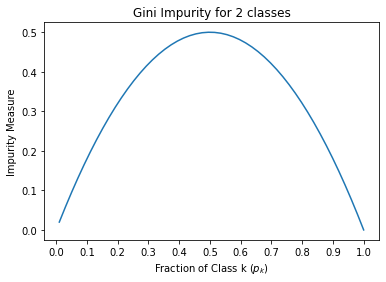

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#A figure is created to show Gini ımpurity measures 
plt.figure()
x = np.linspace(0.01,1)
y = 1 - x**2 - (1-x)**2
plt.plot(x,y)
plt.title('Gini Impurity for 2 classes')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()


#### Exemplo

Digamos que uma amostra de __30 alunos__ tem duas variáveis: __Sexo__ (menino ou menina), __Classe (IX ou X)__. Digamos também que __15 jogam tênis__ no recreio. Para criar um modelo capaz de __prever quem vai jogar tênis durante o recreio__, precisamos segregar os alunos que jogam tênis no recreio com base nas variáveis à nossa disposição. A árvore de decisão segregará os alunos com base nos valores das variáveis e identificará a variável que cria os melhores conjuntos homogêneos de alunos.

![Title](images/tree_gini.jpg)

1. Árvore com critério Gini: $Gini(D)=1−\sum p_i^2$

- **Impureza antes da divisão**: Como não havia separação alguma, a impureza era dada simplesmente pelo balanço natural dos dados: 

$$G(\text{pré-divisão}) = 1 - ((15/30)^2 + (15/30)^2) = 0.5$$

Temos duas quebras possíveis:
- **1.1 Divisão por sexo:** 

<table>
<thead>
  <tr>
    <th colspan="4"><center>Sexo</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Meninas</center></td>
    <td colspan="2"><center>Meninos</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>2</center></td>
    <td><center>8</center></td>
    <td><center>13</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>10</center></td>
    <td colspan="2"><center>20</center></td>
  </tr>
</tbody>
</table>

Segundo a tabela acima, após a divisão dos dados pela feature **sexo** passamos a ter as seguintes impurezas:

* $G(meninas) = 1 - (\frac{2}{10}^2 + \frac{8}{10}^2) = 0.319$
* $G(meninos) = 1 - ( \frac{13}{20}^2 + \frac{7}{20}^2) = 0.454$

Após a divisão, a impureza total passa a ser a média ponderada:

* $G(pós-divisão) = \frac{10}{30} \times G(meninas) + \frac{20}{30} \times G(meninos) = 0.33 \times 0.319 + 0.66 \times 0.454 = 0.40491$
* $G_{gain} = G(pré-divisão) - G(pós-divisão) = 0.5 - 0.40491 = 0.095$

<br>
<br>
<br>

- **1.2 Divisão por classe:**

<table>
<thead>
  <tr>
    <th colspan="4"><center>Classe</center></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td colspan="2"><center>Classe IX</center></td>
    <td colspan="2"><center>Classe X</center></td>
  </tr>
  <tr>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
    <td><center>jogam tênis</center></td>
    <td><center>NÃO jogam tênis</center></td>
  </tr>
  <tr>
    <td><center>6</center></td>
    <td><center>8</center></td>
    <td><center>9</center></td>
    <td><center>7</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>14</center></td>
    <td colspan="2"><center>16</center></td>
  </tr>
</tbody>
</table>

Segundo a tabela acima, após a divisão dos dados pela feature **classe** passamos a ter as seguintes impurezas:

- $G(IX) = 1 - (\frac{6}{14}^2 + \frac{8}{14}^2) = 0.489$
- $G(X) = 1 - ( \frac{9}{16}^2 + \frac{7}{16}^2) = 0.492$

Ou seja, após a divisão, a impureza total passa a ser a média ponderada: 

- $G(pós-divisão) = \frac{14}{30} \times G(IX) + \frac{16}{30} \times G(X) = 0.46 \times 0.489 + 0.53 \times 0.492 = 0.4857$
- $G_{gain} = G(pré-divisão) - G(pós-divisão) = 0.5 - 0.4857 =  0.014$

<br>
<br>
<br>

Qual critério escolher? Aquele que tiver maior ganho!
<br>
<br>
<br>

### **Critério de entropia**

A **entropia** é uma quantidade que tem o objetivo de quantificar **o grau de desordem de um sistema**, ou, equivalentemente, **o quanto de informação se tem sobre determinado sistema**.

A entropia é dada por:

 $$S = -\sum{p_{i} \times \log_{2}{p_{i}}} = -p \log_{2}(p) - q \log_{2}(q)$$
 
 
Onde $p_i$ são as proporções de separação do __target__ em cada quebra. Os valores de entropia variam entre 0 e 1 no qual o valor 0 representa folhas puras enquanto no valor 1 temos uma distribuição uniforme das classes.

Aqui estaremos interessados **em como a impureza muda após as quebras**. 
 
Aqui também estaremos interessados **em como a entropia muda após as quebras**. Nosso objetivo será **maximizar o ganho de informação proporcionado pela quebra nos nós** -- mais precisamente, estamos interessados em determinar **qual é a quebra que proporciona o maior ganho de informação**.

- **Entropia antes da divisão**: 

$$S(pré-divisão) = -1 \times( \frac{15}{30}log_{2}{\frac{15}{30}} + \frac{15}{30}log_{2}{\frac{15}{30}} ) = 1$$


Temos duas quebras possíveis:

- Divisão por sexo: 

    - $S(\text{meninas}) = -1 \times (\frac{2}{10} \log_{2}\frac{2}{10} + \frac{8}{10} \log_{2}\frac{8}{10}) = 0.721$
    - $S(\text{meninos}) = -1 \times (\frac{13}{20} \log_{2}\frac{13}{20} + \frac{7}{20} \log_{2}\frac{7}{20}) = 0.934$
    
    A entropia ponderada após a divisão por **sexo** é:
    
    <br>
    
    - $S(\text{pós-divisão}) = \frac{10}{30} \times S(\text{meninas}) + \frac{20}{30} \times S(\text{meninos}) =  0.863$
    
    Assim, o ganho de informação após a divisão por **sexo** é:
    
    <br>
    
    - $\Delta S_{\text{sexo}} = S(\text{pré-divisão}) - S(\text{pós-divisão}) = 1 - 0.863 =$ **0.137**

<br>

- Divisão por classe:

    - $S(\text{IX}) = ?$
    - $S(\text{X}) = ?$
    
    A entropia ponderada após a divisão por **classe** é:
    
    <br>
    
    - $S(\text{pós-divisão}) = \frac{10}{30} \times S(\text{IX}) + \frac{20}{30} \times S(\text{X}) = ?$
    
    Assim, o ganho de informação após a divisão por **classe** é:
    
    <br>
    
    - $\Delta S_{\text{classe}} = S(\text{pré-divisão}) - S(\text{pós-divisão}) = ? $

Pela entropia, a divisão a ser escolhida seria por ?. 

Depois, aplica-se o mesmo procedimento para os nós resultantes, até obter-se nós puros.

### Gini x Entropia
A Impureza de Gini e a Entropia têm duas diferenças principais:

> 1. A Impureza de Gini tem valores dentro do intervalo [0, 0.5] enquanto que o intervalo da Entropia é [0, 1]. Na figura a seguir, ambos estão representados. O índice de Gini também foi representado multiplicado por dois para ver concretamente as diferenças entre eles, que não são muito significativas.
<br>

> 2. Computacionalmente, a entropia é mais complexa, pois faz uso de logaritmos e, consequentemente, o cálculo da Impureza de Gini será mais rápido.

<img src="images/entropy_and_gini.png"  style="width:800px" />



Fonte: https://quantdare.com/decision-trees-gini-vs-entropy/

https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf

## Formulação prática: árvore de decisão


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../data/bank-full.csv") 

In [4]:
# particionar dados
from sklearn.model_selection import train_test_split 

# Separar feature e target
y = df['Target'].copy()
X = df.drop('Target', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.9, random_state=42) 

### Análise exploratória

Temos nulos?

In [5]:
X_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [6]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13792,37,management,single,secondary,no,1981,no,no,cellular,10,jul,140,2,-1,0,unknown
21309,51,technician,married,secondary,no,2242,no,no,cellular,18,aug,498,3,-1,0,unknown
27444,43,management,married,tertiary,no,1751,yes,no,cellular,21,nov,146,4,-1,0,unknown
3316,44,blue-collar,single,secondary,no,641,no,no,unknown,15,may,257,1,-1,0,unknown
7167,53,blue-collar,married,primary,no,436,yes,no,unknown,29,may,154,1,-1,0,unknown


In [7]:
y_train.value_counts(normalize=True)

no     0.88299
yes    0.11701
Name: Target, dtype: float64

Vamos ver o pairplot com as cores dadas pelo "Target"

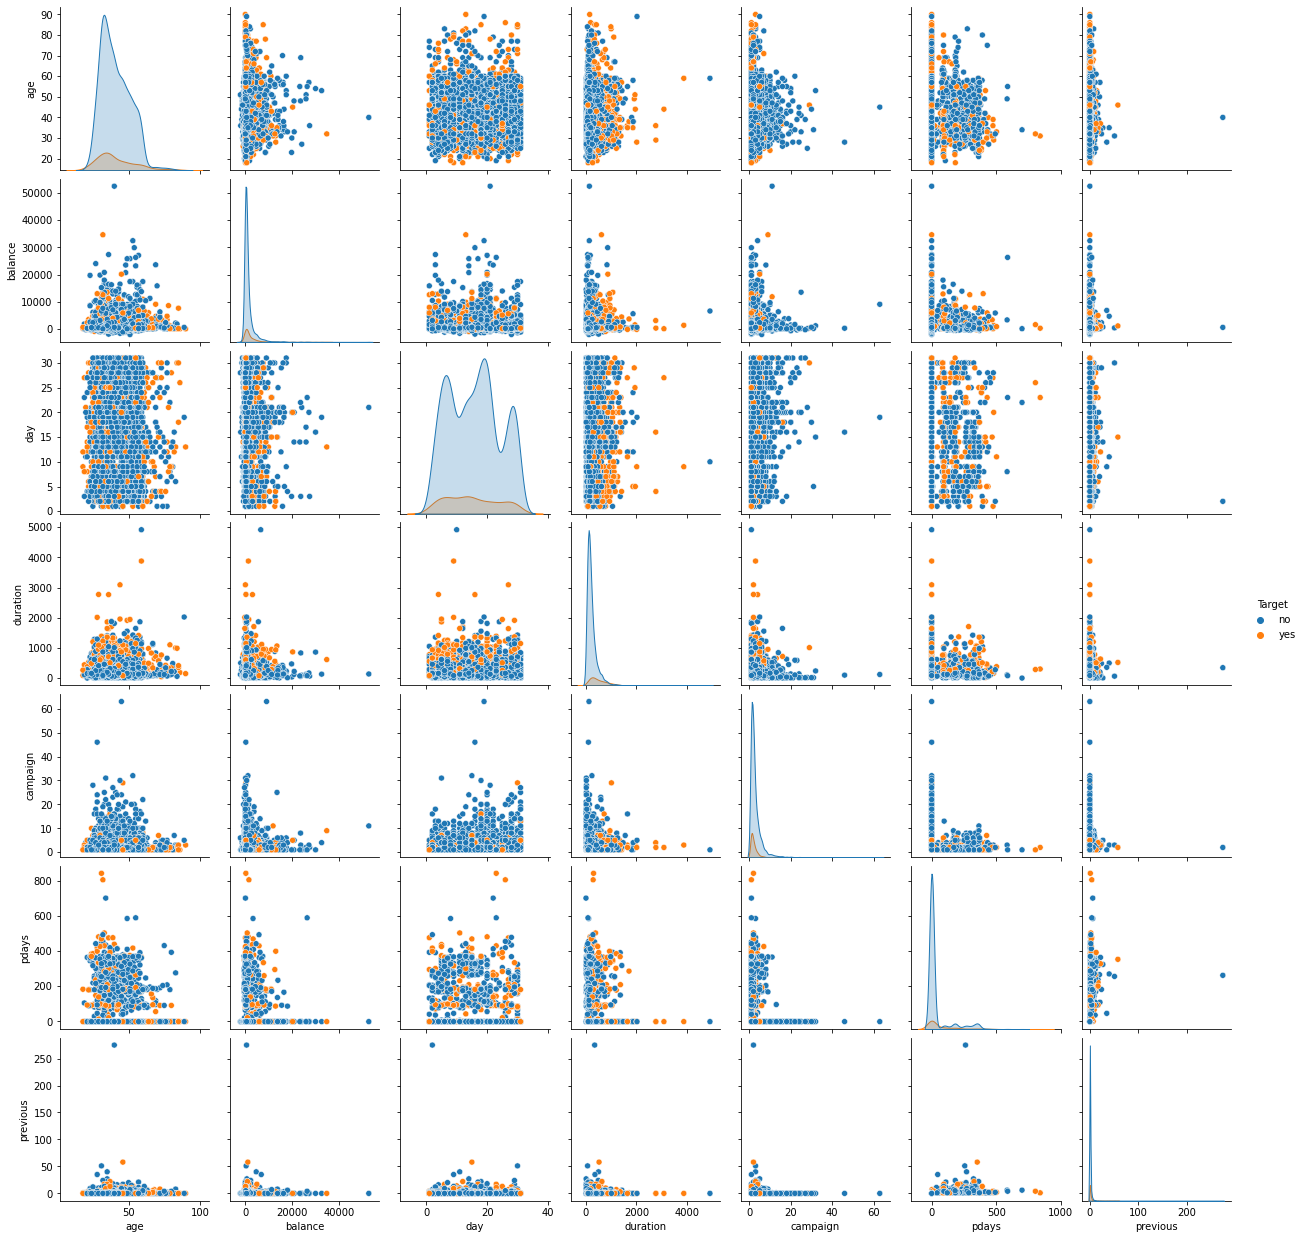

In [8]:
sns.pairplot(data=pd.concat([X_train, y_train], axis=1), hue="Target")

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 13792 to 3184
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 729.5+ KB


In [10]:
X_train.housing.unique()

array(['no', 'yes'], dtype=object)

In [11]:
X_train.marital.unique()

array(['single', 'married', 'divorced'], dtype=object)

In [12]:
X_train.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [13]:
X_train.loan.unique()

array(['no', 'yes'], dtype=object)

#### Tratamento de dados

Vamos manter apenas as colunas 'marital', 'age', 'balance', 'duration', 'education', 'housing' 
e resetar o index do X_train e X_test

In [14]:
keep_columns = ['marital', 'age', 'balance', 'duration', 'education', 'housing']
X_train = X_train[keep_columns].copy()

In [15]:
X_train.head()

,marital,age,balance,duration,education,housing
13792,single,37,1981,140,secondary,no
21309,married,51,2242,498,secondary,no
27444,married,43,1751,146,tertiary,yes
3316,single,44,641,257,secondary,no
7167,married,53,436,154,primary,yes


Vamos criar uma lista com as variáveis numéricas e outra com as categóricas:

In [16]:
X_train.select_dtypes(include='number').columns

Index(['age', 'balance', 'duration'], dtype='object')

In [17]:
colunas_numericas = list(X_train.select_dtypes(include='number').columns)
colunas_categoricas =  list(X_train.select_dtypes(exclude='number').columns)

In [18]:
colunas_categoricas

['marital', 'education', 'housing']

In [19]:
colunas_numericas

['age', 'balance', 'duration']

In [20]:
y_train

13792    no
21309    no
27444    no
3316     no
7167     no
         ..
21935    no
22176    no
20979    no
13679    no
3184     no
Name: Target, Length: 4521, dtype: object

Com o OneHotEncoder e LabelEncoder do sklearn.preprocessing, vamos converter as colunas categóricas do treino em dummy:

In [21]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder(sparse=False)
le = LabelEncoder()


X_train_enc = ohe.fit_transform(X_train[colunas_categoricas])
X_train_enc

y_train = le.fit_transform(y_train)


Como podemos obter o nome das colunas após o OneHotEncoder? Método get_feature_names_out!

In [22]:
ohe.get_feature_names_out(colunas_categoricas)

array(['marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes'], dtype=object)

Podemos converter em um pandas:

In [23]:
X_train_enc = pd.DataFrame(X_train_enc, columns=ohe.get_feature_names_out(colunas_categoricas))
X_train_enc

,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4516,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4517,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4518,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4519,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Precisamos voltar a ter nosso dataset tanto com as colunas convertidas pelo OneHotEncoder quanto as numéricas:

In [24]:
X_train = X_train.reset_index(drop=True)

In [25]:
X_train

,marital,age,balance,duration,education,housing
0,single,37,1981,140,secondary,no
1,married,51,2242,498,secondary,no
2,married,43,1751,146,tertiary,yes
3,single,44,641,257,secondary,no
4,married,53,436,154,primary,yes
...,...,...,...,...,...,...
4516,married,35,1144,197,secondary,no
4517,married,57,121,135,tertiary,no
4518,married,43,354,169,tertiary,no
4519,married,32,0,90,primary,yes


In [26]:
X_train = pd.concat([X_train[colunas_numericas], X_train_enc], axis=1)

In [27]:
X_train

,age,balance,duration,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes
0,37,1981,140,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,51,2242,498,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,43,1751,146,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,44,641,257,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,53,436,154,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,35,1144,197,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4517,57,121,135,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4518,43,354,169,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4519,32,0,90,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Vamos aplicar esses mesmos tratamentos ao conjunto de teste.

In [28]:
X_test = X_test[keep_columns].copy()
X_test = X_test.reset_index(drop=True)

X_test_enc = ohe.transform(X_test[colunas_categoricas])

y_test = le.transform(y_test)

X_test_enc = pd.DataFrame(X_test_enc, columns=ohe.get_feature_names_out(colunas_categoricas))

X_test = pd.concat([X_test[colunas_numericas], X_test_enc], axis=1)
X_test

,age,balance,duration,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes
0,49,-57,161,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,58,3,129,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,48,476,489,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33,241,1108,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,53,9252,277,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40685,22,4132,34,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
40686,44,10386,95,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
40687,35,538,21,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
40688,40,3,998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### Classificação

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 

# Instância modelo de classificação
model = DecisionTreeClassifier()

# Treina o modelo
model.fit(X_train, y_train)

# Prediz nos dados de teste
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

### Avaliar modelo

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     35930
           1       0.30      0.33      0.31      4760

    accuracy                           0.83     40690
   macro avg       0.61      0.61      0.61     40690
weighted avg       0.84      0.83      0.84     40690



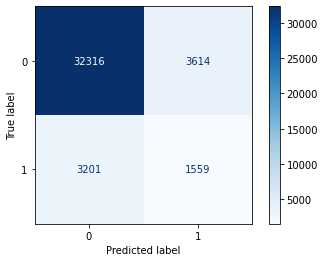

In [30]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay, confusion_matrix

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot(cmap='Blues')

### Visualizando a árvore

In [31]:
plt.figure(figsize=(520, 500))

plot_tree(model, max_depth=3, class_names=['no', 'yes'], fontsize=62, feature_names=X_train.columns, filled=True)

plt.show()

: 

: 

O que acontece quando chega um ponto novo?

________________________________________________
________________________________________________
________________________________________________


#### Etapas para modelagem

1. Investigação da base
    - matriz de correlação, entende os atributos, balanceamento dos dados
2. Transformação de dados numéricos
    - one hot encoding 
    - label encoder 
3. Normalização dos dados
    - distribuição de dados mt distinta
4. Balanceamento
    - Oversampling ou undersampling
5. Particionar a base de dados
    - Treino (modelagem) - X_train
    - Teste (X_test, y_test)
5. Treina o algoritmo
    - X_train
    - encontrar padrões com base no x_train
6. Teste
    - Usar X_test para prever novas amostras
    - Gerar y_pred
    - Avaliação de desempenho: comparar o y_test e y_pred

## Material extra de estudo
[Comparação computacional do tempo de treino entre Gini e Entropia](https://quantdare.com/decision-trees-gini-vs-entropy/) <br>
[4 formas de visualizar a árvore de decisão](https://mljar.com/blog/visualize-decision-tree/) <br>
[Scikit](https://scikit-learn.org/stable/modules/tree.html#tree) <br>
[Site bacana](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)


________________________________________________
________________________________________________
________________________________________________


## Exercícios
1 - Refaça o treino da árvore de decisão com validação cruzada.


2 - Agora com esse dataset faça uma validação cruzada para alguns valores de k e compare com o modelo criado no exercício anterior. Qual foi o melhor modelo?

3 - Vamos usar dados de falhas cardíacas para prever se uma falha irá acontecer ou não. Os dados estão no dataset "data/heart_failures.csv".

Utilize o modelo de árvores de decisão e preveja se a falha cardíaca irá acontecer testando as duas métricas de split.

Tente comparar com um modelo de regressão logística e um KNN.

Recomendação: façam os exercícios em um novo notebook. Ao longo do curso iremos implementar melhorias e comparações com outros modelos. E separando em um novo notebook fica mais fácil de salvar no git como portfólio ou postar no linkedin.

